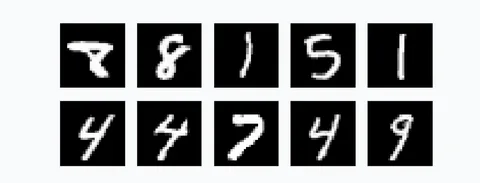

**MNIST Dataset and Image Classification**

The MNIST (Modified National Institute of Standards and Technology) dataset is one of the most widely used benchmark datasets in the field of computer vision and machine learning. It consists of a large collection of handwritten digit images, designed for training and evaluating image classification algorithms. The dataset has become a foundational resource for researchers and practitioners aiming to develop and test models for image recognition tasks.

In addition, the MNIST dataset contains a total of 70,000 grayscale images of handwritten digits ranging from 0 to 9. Each image is of size 28×28 pixels, resulting in 784 features per image when flattened into a one-dimensional array. The dataset is divided into a training set of 60,000 images and a test set of 10,000 images. Each image is labeled with the corresponding digit it represents, making this a supervised learning problem.

On the other hand, the primary objective of working with the MNIST dataset is to perform **image classification**, where the goal is to train a model that can accurately recognize and classify new, unseen handwritten digits. Image classification involves several steps, including preprocessing the data, extracting features, training a model, and evaluating its performance.

A variety of machine learning and deep learning techniques have been applied to the MNIST dataset. Traditional approaches include logistic regression, k-nearest neighbors (KNN), and support vector machines (SVM). However, modern methods often involve deep learning models, particularly convolutional neural networks (CNNs), which are specifically designed to process grid-like data such as images. CNNs automatically learn spatial hierarchies of features from input images through the use of convolutional, pooling, and fully connected layers.

The performance of classification models on MNIST is typically evaluated using metrics such as accuracy, precision, recall, and the confusion matrix. Due to its simplicity, relatively small size, and well-understood structure, MNIST serves as an ideal starting point for those learning about image classification and neural network architectures.

In conclusion, the MNIST dataset is a fundamental resource for developing and testing image classification algorithms. It provides a standardized environment to explore key machine learning techniques and remains a cornerstone example in the field of computer vision.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

* **Normalization of Pixel Values in Image Data**

This code is applied to the MNIST dataset or any similar dataset that contains images represented as pixel intensity values. In the original form, each image is stored as a matrix of integers ranging from 0 to 255, where 0 represents black and 255 represents white (in the case of grayscale images).

Thus, to improve model performance and numerical stability, these values are converted to floating-point numbers between 0 and 1. This process is known as *normalization*, and it ensures that all input values lie within the same scale, which is important for gradient-based optimization algorithms used in training neural networks.

* *Steps*

1. *Conversion to float32*:
   The method *.astype('float32')* converts the integer pixel values to 32-bit floating-point numbers. This is necessary because dividing integers by 255 without type casting would result in truncated values in some programming languages or frameworks.

2. *Scaling to \[0, 1]*:
   Each pixel value is divided by 255.0, the maximum possible intensity for an 8-bit image. This scales all pixel values from the range \[0, 255] to the range \[0, 1].

*Formula: * $p_{\text{normalized}} = \frac{p}{255.0}$

In here,

* $p$ is the original pixel intensity (0 to 255),
* $p_{\text{normalized}}$ is the normalized pixel value (0.0 to 1.0).

In [4]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

* **Reshaping Image Data for a Neural Network**

The MNIST dataset consists of grayscale images, each of size 28 × 28 pixels. Initially, each image is stored as a 2-dimensional array of shape (28, 28). However, many traditional neural networks (such as fully connected feedforward networks) expect the input in the form of one-dimensional feature vectors rather than two-dimensional matrices.

This code reshapes each 28 × 28 image into a flat array of 784 elements (since $28 \times 28 = 784$). This transformation allows the images to be fed into a dense input layer of a neural network.


* The *.reshape(-1, 28 * 28)* function changes the shape of the dataset:

  * The *-1* tells numpy to automatically determine the number of samples based on the original shape.
  * *28 * 28* specifies the new dimension of each sample, flattening the 2D image into a 1D vector of 784 features.

* *Mathematical Interpretation*

Let $X \in \mathbb{R}^{n \times 28 \times 28}$ be the original training data, where $n$ is the number of images. After reshaping: $X_{\text{reshaped}} \in \mathbb{R}^{n \times 784}$

Each image becomes a row in a matrix of 784 features, suitable for use as input in a fully connected neural network layer.

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### **One-Hot Encoding of Class Labels**

The MNIST dataset contains ten classes, representing the digits 0 through 9. Initially, the labels are represented as single integer values (e.g., 3, 7), where each value directly identifies the class of the corresponding image. However, for training a neural network using categorical cross-entropy loss, it is necessary to convert these integer labels into a **one-hot encoded format**.

One-hot encoding transforms a class label into a binary vector of length equal to the number of classes. In this representation, all elements of the vector are set to 0, except for the index corresponding to the actual class, which is set to 1.

#### **Example**

If a sample has a label *3*, one-hot encoding converts it to the following vector => $[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]$
In here, the fourth element (index 3) is 1, indicating the correct class.

#### **Explanation of the Code**

* *tf.keras.utils.to_categorical()* is a utility function provided by TensorFlow/Keras that automatically performs one-hot encoding.
* The second argument *(10)* specifies the number of classes in the dataset. This determines the length of the resulting one-hot vectors.
* The function is applied separately to the training and testing label sets *(y_train and y_test)*, converting them from integer class labels to one-hot encoded arrays.

#### **Mathematical Interpretation**

Let $y_i \in \{0, 1, \ldots, 9\}$ be the original class label for the $i^{\text{th}}$ image. One-hot encoding transforms it into a vector $\mathbf{y}_i \in \mathbb{R}^{10}$ such that => $\mathbf{y}_i[j] =\begin{cases}1, & \text{if } j = y_i \\0, & \text{otherwise}\end{cases}$

This format is required by many classification models that output a probability distribution over multiple classes.

In [6]:
# Build the NN model

model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### **Neural Network Model Architecture for Image Classification**

The architecture is built using the *Sequential* API, which allows for stacking layers in a linear manner. The structure of the network is as follows:

1. **Input Layer**:
  The input layer receives vectors of size 784, corresponding to flattened 28×28 pixel grayscale images from the MNIST dataset.

2. **First Hidden Layer**:
  A fully connected *(Dense)* layer with 512 neurons and ReLU (Rectified Linear Unit) activation is used. ReLU is defined as:
  
  *Formula: *$f(x) = \max(0, x)$

  This activation introduces non-linearity and helps the network learn complex patterns. A *Dropout* layer with a dropout rate of 0.3 follows, randomly deactivating 30% of neurons during training to reduce overfitting.

3. **Second Hidden Layer**:
  This layer consists of 256 neurons, also using ReLU activation, followed by another dropout layer with the same rate (0.3).

4. **Third Hidden Layer**:
  A dense layer with 128 neurons and ReLU activation, providing additional capacity for learning hierarchical features.

5. **Output Layer**:
  The final layer is a dense layer with 10 neurons (one for each digit class) and *softmax activation*, which converts the raw output scores into a probability distribution over the 10 classes:

  $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{10} e^{z_j}}$

  This ensures the outputs are in the range \[0, 1] and sum to 1, making them interpretable as class probabilities.

#### **Model Compilation**

1. **Optimizer**: The Adam optimizer is used, which combines the benefits of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp) to update the weights efficiently.

2. **Loss Function**: Categorical cross-entropy is used as the loss function, suitable for multi-class classification problems with one-hot encoded labels.

*Formula: *$L = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)$

where $y_i$ is the true label and $\hat{y}_i$ is the predicted probability for class $i$.

3. **Metric**: Accuracy is used as the evaluation metric, indicating the proportion of correctly classified samples.

#### **Model Summary**

The *model.summary()* function provides a structured overview of the model, including the number of layers, output shapes, and trainable parameters. This summary is useful for verifying the architecture and understanding the model’s complexity.

In [7]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20,
                    validation_split = 0.2, verbose = 1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8031 - loss: 0.6418 - val_accuracy: 0.9609 - val_loss: 0.1302
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9542 - loss: 0.1483 - val_accuracy: 0.9699 - val_loss: 0.1009
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9683 - loss: 0.1028 - val_accuracy: 0.9736 - val_loss: 0.0911
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9741 - loss: 0.0826 - val_accuracy: 0.9743 - val_loss: 0.0847
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9768 - loss: 0.0704 - val_accuracy: 0.9747 - val_loss: 0.0865
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9813 - loss: 0.0587 - val_accuracy: 0.9779 - val_loss: 0.0762
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9834 - loss: 0.0520 - val_accuracy: 0.9777 - val_loss: 0.0816
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9871 - loss: 0.0432 - val

### **Model Training with Keras**

This trains the model on the training dataset *(x_train and y_train)* and includes several important parameters that control the training procedure:

#### **Training Parameters**

1. *batch_size = 128*:
  The batch size determines the number of training samples processed before the model’s weights are updated. A batch size of 128 means that the model will process 128 samples at a time before performing a backpropagation step. This setting balances training speed and memory usage.

2. *epochs = 20*:
  The number of epochs specifies how many times the model will iterate over the entire training dataset. Here, the training process will run for 20 complete passes through the data.

3. *validation_split = 0.2*:
  This parameter indicates that 20% of the training data will be set aside for validation. The model will not use this subset for training but will evaluate its performance on it after each epoch. This helps in monitoring for overfitting and assessing generalization during training.

4. *verbose = 1*:
  This setting controls the level of output displayed during training. A value of 1 enables a progress bar with real-time updates on the training and validation loss and accuracy after each epoch.

As a result, the function returns a **history** object, stored in the variable **history**. This object contains the training and validation loss and accuracy metrics for each epoch. These values are useful for visualizing and analyzing the model’s performance over time, such as through learning curves.

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

Test accuracy: 0.9826, Test loss: 0.0725


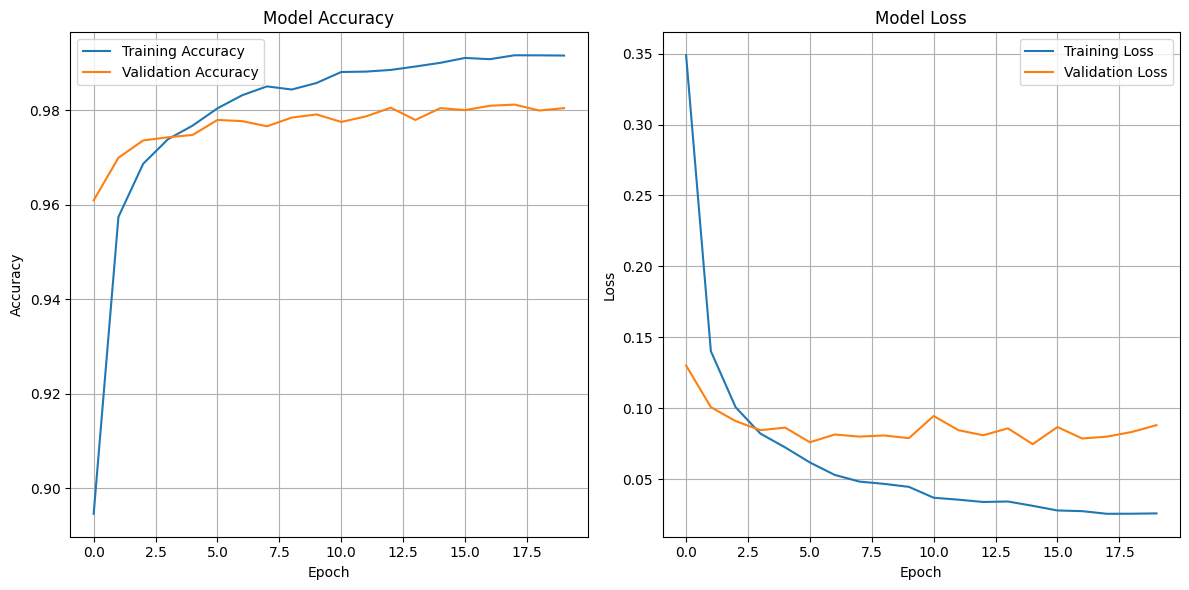

In [12]:
plt.figure(figsize = (12, 6))

# Accuracy

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()

In [13]:
plt.savefig('history.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In conclusion, the implemented neural network using TensorFlow and Keras effectively classifies handwritten digits from the MNIST dataset, achieving approximately 98% test accuracy. The model, featuring three hidden layers with ReLU activation and dropout regularization, demonstrates robust performance through stable convergence, as evidenced by the training and validation accuracy/loss curves. The visualization of the training history highlights the model's learning process, showing consistent improvement and minimal overfitting. This project successfully showcases a well-structured deep learning pipeline, from data preprocessing to model evaluation, suitable for image classification tasks.

In [14]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

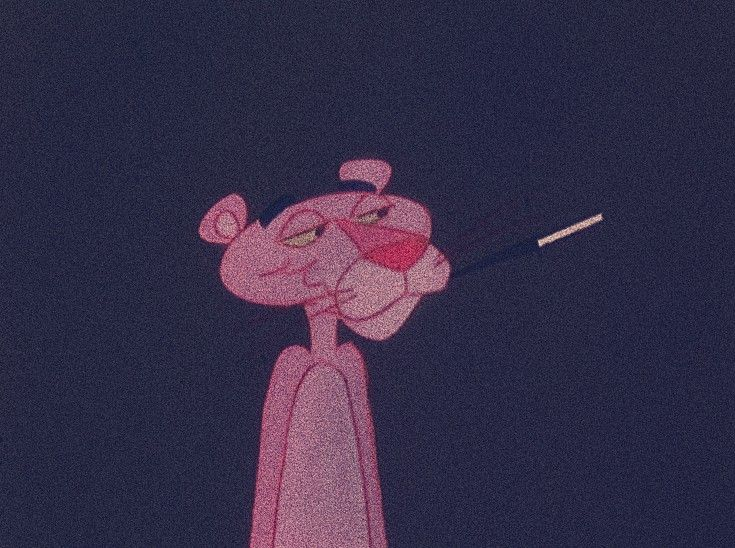